## 계층적 군집분석

In [12]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/USArrests.csv'
df = pd.read_csv(url).rename({'Unnamed: 0': 'State'}, axis=1)
labels = df.State.tolist()
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


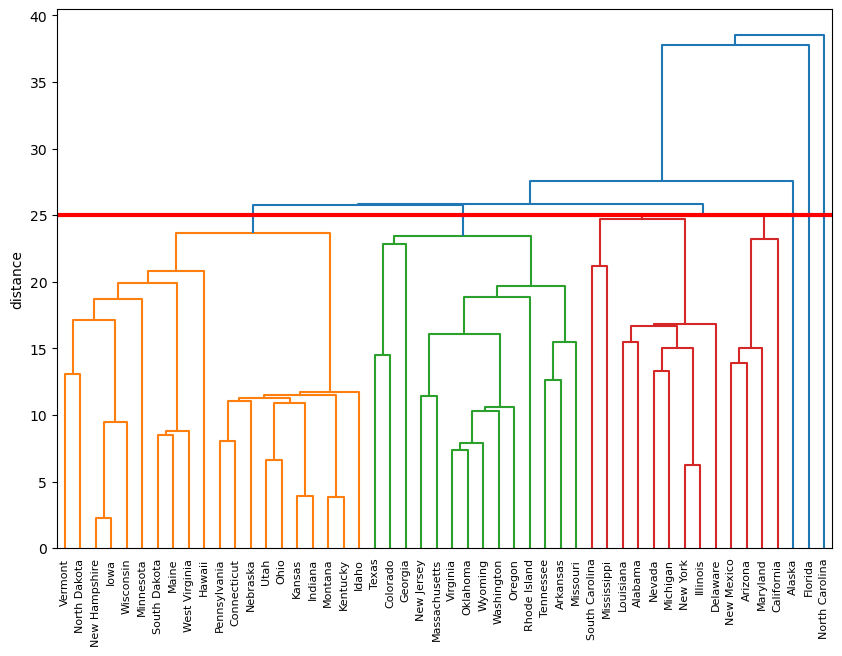

In [14]:
features = [column for column in df.columns if column != 'State']

single  = linkage(df[features], metric='euclidean', method='single')
threshold = 25

plt.figure(figsize=(10, 7))
dendrogram(
    single,
    orientation='top',
    labels=labels,
    distance_sort='descending',
    color_threshold=threshold,
    show_leaf_counts=True
)

plt.axhline(y=threshold, color='r', linewidth=3)
plt.ylabel('distance')
plt.show()

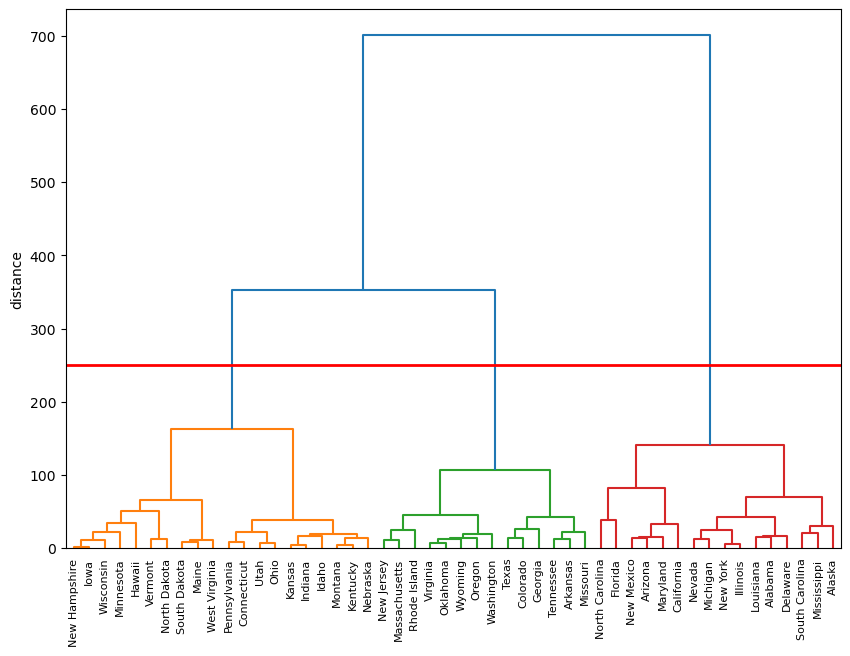

In [16]:
ward  = linkage(df[features], metric='euclidean', method='ward')
threshold = 250

plt.figure(figsize=(10, 7))
dendrogram(
    ward,
    labels=labels,
    distance_sort='descending',
    color_threshold=threshold,
    show_leaf_counts=True
)
plt.axhline(y=threshold, color='r', linewidth=2)
plt.ylabel('distance')
plt.show()

In [18]:
assignments = fcluster(ward, threshold, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [21]:
df['cluster_label'] = assignments
df.groupby('cluster_label').mean()

,Murder,Assault,UrbanPop,Rape
cluster_label,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [23]:
df[df['cluster_label'] == 1]

,State,Murder,Assault,UrbanPop,Rape,cluster_label
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
17,Louisiana,15.4,249,66,22.2,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1


## 비계층적 군집분석